# Biological Classification problem with phenotype

Note: I don't own the data. It is gitignored to protect patent

In [ ]:
import pandas as pd

df = pd.read_csv("plant_traits_espece_ee.csv")
df.columns = ['organs', 'trait', 'trait_code', 'finer_code/detail'] + df.columns.to_list()[4:]
df = df.transpose()
df = df.reset_index()

n = len(df.iloc[0])

import numpy as np

# p_organs, p_trait, p_trait_code = [np.nan] * 3


for j in range(5, n):
    if pd.isnull(df.iloc[0, j]):
        df.iloc[0, j] = p_organs
    else:
        p_organs = df.iloc[0, j]
    
    if pd.isnull(df.iloc[1, j]):
        df.iloc[1, j] = p_trait
    else:
        p_trait = df.iloc[1, j]

    if pd.isnull(df.iloc[2, j]):
        df.iloc[2, j] = p_trait_code
    else:
        p_trait_code = df.iloc[2, j]


    df.iloc[3, j] = ">".join(map(str, (p_organs, p_trait, p_trait_code)))

df.iloc[0:3,4] = np.nan


df2 = df.iloc[3:,:]
# df2[0] = df2[0].astype(str)
df2.iloc[0,0] = 'organs>trait>trait_code>detail'
new_header = df2.iloc[0]
df2 = df2[1:] 
df2.columns = new_header
# df2

we can do some direct filtering

In [43]:
df2.iloc[~pd.isnull(df2['usage>usage.material>staminal.tube'].values)]

3,organs>trait>trait_code>detail,Family,UICN,Commentaire,detail,uicn>statut_uicn>nan,uicn>statut_uicn>nan,uicn>statut_uicn>nan,uicn>statut_uicn>nan,uicn>statut_uicn>nan,...,usage>seed.poisonous>staminal.tube,usage>seed.poisonous>staminal.tube,usage>agro-forestry>staminal.tube,usage>agro-forestry>staminal.tube,usage>usage.dyeing>staminal.tube,usage>usage.dyeing>staminal.tube,usage>usage.material>staminal.tube,usage>usage.material>staminal.tube,usage>clothing>staminal.tube,usage>clothing>staminal.tube
15,Anthonotha crassifolia,Fabaceae,NaN,"pas de données dans prota, no image sur http:/...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN


Prediction(without reweighting)
the family don't share that much info, and the result is poor due to insufficient data.

In [154]:
df_w_label = df2.dropna(subset='Family')
df_w_label.iloc[:,5:] = [[df_w_label.iloc[i,j] if pd.isnull(df_w_label.iloc[i,j]) else 1 for j in range(5,n)] for i in range(len(df_w_label))]
X = df_w_label.iloc[:,5:]
y = df_w_label['Family']

# from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
m = RandomForestClassifier(n_jobs=4, random_state=3)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss


X_train,  X_test,y_train, y_test = train_test_split(X, y, test_size=.5, random_state=3)# stratify=y)
# print(X_train)
# print(y_train)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
y_prob = m.predict_proba(X_test)
y_prob ={m.classes_[i]:[y_prob[j][i]for j in range(len(y_prob))] for i in range(len(m.classes_))} 


perf = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
# log_loss(y_test, y_prob)
perf,# conf



(0.625,)

In [155]:
y_prob

{'APTANDRACEAE (Olacaceae)': [0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.11, 0.11],
 'Annonaceae': [0.25, 0.24, 0.25, 0.24, 0.26, 0.24, 0.25, 0.25],
 'Combretaceae': [0.2, 0.24, 0.18, 0.19, 0.2, 0.19, 0.22, 0.21],
 'Fabaceae': [0.28, 0.29, 0.31, 0.32, 0.27, 0.29, 0.28, 0.28],
 'Rutaceae': [0.16, 0.12, 0.14, 0.13, 0.15, 0.16, 0.14, 0.15]}

In [143]:
m.classes_

array(['APTANDRACEAE (Olacaceae)', 'Annonaceae', 'Combretaceae',
       'Fabaceae', 'Rutaceae'], dtype=object)

This is not valid because the classifier is ignoring all missings and there is no 2 values for non nas. Here we think na= false, redo it

In [157]:
df_w_label = df2.dropna(subset='Family')
df_w_label.iloc[:,5:] = [[0 if pd.isnull(df_w_label.iloc[i,j]) else 1 for j in range(5,n)] for i in range(len(df_w_label))]
X = df_w_label.iloc[:,5:]
y = df_w_label['Family']

# from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
m = RandomForestClassifier(n_jobs=4, random_state=3)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss


X_train,  X_test,y_train, y_test = train_test_split(X, y, test_size=.5, random_state=3)# stratify=y)
# print(X_train)
# print(y_train)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
y_prob = m.predict_proba(X_test)
y_prob ={m.classes_[i]:[y_prob[j][i]for j in range(len(y_prob))] for i in range(len(m.classes_))} 


perf = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
# log_loss(y_test, y_prob)
perf,# conf



(0.5,)

here 50% probability we get correct family, is this bad? somewhat, but remember we get more than 2 classes.
now we want to formulate this as stepwise question


In [159]:
df_w_label = df2.dropna(subset='Family')
df_w_label.iloc[:,5:] = [[0 if pd.isnull(df_w_label.iloc[i,j]) else 1 for j in range(5,n)] for i in range(len(df_w_label))]
X = df_w_label.iloc[:,5:]
y = df_w_label['Family']

# from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
m = DecisionTreeClassifier()

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss


X_train,  X_test,y_train, y_test = train_test_split(X, y, test_size=.5, random_state=3)# stratify=y)
# print(X_train)
# print(y_train)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
y_prob = m.predict_proba(X_test)
y_prob ={m.classes_[i]:[y_prob[j][i]for j in range(len(y_prob))] for i in range(len(m.classes_))} 


perf = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
# log_loss(y_test, y_prob)
perf,# conf



(0.375,)

[Text(0.625, 0.875, 'x[536] <= 0.5\ngini = 0.735\nsamples = 7\nvalue = [1, 1, 1, 3, 1]'),
 Text(0.5, 0.625, 'x[435] <= 0.5\ngini = 0.75\nsamples = 4\nvalue = [1, 1, 1, 0, 1]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'x[9] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 0, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(0.75, 0.375, 'x[168] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0]'),
 Text(0.6875, 0.75, '  False')]

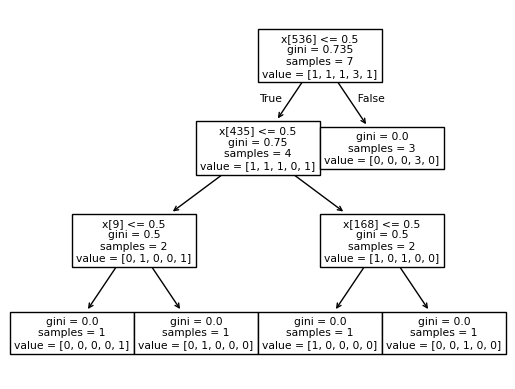

In [160]:
plot_tree(m)

We build a sequence of entities

In [181]:
import re
property_words = set(sum(list(map(lambda s: re.split('>', s),df2.columns.tolist())), []))
species_words = set(sum(list(map(lambda s: re.split('\s', s),df2.iloc[:,0].values)), []))
species_words ,property_words

all_words = species_words.union(property_words)


We can also account for mistyping or synonyms. In case for so many terms, one may have misspelled. 
Make a bench mark by sorting Levishtin edit distance to account for misspelled word.

let's try to see if there are 'usages'

In [182]:
# !pip install editdistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 14.5 MB/s eta 0:00:00


In [212]:
import editdistance

query = 'usages'

distances = list(map(lambda word: editdistance.eval(query, word), list(all_words)))

rank = np.argsort(distances)
for i in range(5):
    print(list(all_words)[rank[i]], distances[rank[i]])


usage 1
Elaeis 4
patens 4
usage.med 4
seed 4


can also do a spell check with this 

In [ ]:
# !pip install sentence-transformers

In [213]:
from sentence_transformers import SentenceTransformer
sentences = ["usages", "usage"]

model = SentenceTransformer('sentence-transformers/LaBSE')
embeddings = model.encode(sentences)
print(embeddings)


/home/hao000/anaconda3/envs/llm2/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.88G [00:00<?, ?B/s]